In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
with open("./Output/colbert_results", "rb") as file:
    colbert_results = pickle.load(file)

with open("./Output/vsm_results_1", "rb") as file:
    vsm_results_1 = pickle.load(file)

with open("./Output/vsm_results_2", "rb") as file:
    vsm_results_2 = pickle.load(file)

In [5]:

# Reading the queries
data = pd.read_csv('Relevant_20', header=None)

# Parse the data and create a dictionary

relevant = []

for line in data[0]:  # Assuming the queries are in the first column
 
   relevant_docs = list(map(int, line.split()))
   relevant.append(relevant_docs)

In [7]:
def recall_precision_curve(result_docs, relevant):

    RP = []
    # result_docs is an array with vector space most relevant docs for each query and relevant is an array with the true relevant
    for i in range(len(result_docs)):

        # Initialize variables for precision, recall, and true positives
        precision_values = []
        recall_values = []
        true_positives = 0

        # Iterate over retrieved documents
        for j, doc in enumerate(result_docs[i]):
            if doc in relevant[i]:
                true_positives += 1

                # Calculate precision and recall at this point
                precision = true_positives /(j+1)
                recall = true_positives / len(relevant[i]) 

                precision_values.append(precision)
                recall_values.append(recall)

        RP.append((recall_values, precision_values))
    
    
    return RP


In [8]:
vsm_rp_1 = recall_precision_curve(vsm_results_1, relevant)
vsm_rp_2 = recall_precision_curve(vsm_results_2, relevant)
colbert_rp = recall_precision_curve(colbert_results, relevant)

In [9]:
print(vsm_rp_1)
print(relevant)

[([0.029411764705882353, 0.058823529411764705, 0.08823529411764706, 0.11764705882352941, 0.14705882352941177, 0.17647058823529413, 0.20588235294117646, 0.23529411764705882, 0.2647058823529412, 0.29411764705882354, 0.3235294117647059, 0.35294117647058826, 0.38235294117647056, 0.4117647058823529, 0.4411764705882353, 0.47058823529411764, 0.5, 0.5294117647058824, 0.5588235294117647, 0.5882352941176471, 0.6176470588235294, 0.6470588235294118, 0.6764705882352942, 0.7058823529411765, 0.7352941176470589, 0.7647058823529411, 0.7941176470588235], [1.0, 1.0, 0.5, 0.5714285714285714, 0.625, 0.46153846153846156, 0.4666666666666667, 0.5, 0.5294117647058824, 0.5263157894736842, 0.4782608695652174, 0.5, 0.43333333333333335, 0.4, 0.36585365853658536, 0.37209302325581395, 0.3617021276595745, 0.375, 0.36538461538461536, 0.23529411764705882, 0.21428571428571427, 0.18803418803418803, 0.17037037037037037, 0.17518248175182483, 0.058004640371229696, 0.05639913232104121, 0.05660377358490566]), ([0.142857142857

In [21]:
def mean_Average_Values(rp):
    ap_values=[]
    for i in range(len(rp)):
        ap=0
        recall_values,precision_values=rp[i]

        for j in range(1,len(recall_values)):
            ap += (recall_values[j] - recall_values[j- 1]) * precision_values[j]
        ap_values.append(ap)
    return np.mean(ap_values)

In [22]:

ap_vsm1=mean_Average_Values(vsm_rp_1)
ap_vsm2=mean_Average_Values(vsm_rp_2)
ap_colbert=mean_Average_Values(colbert_rp)

In [23]:
print(ap_vsm1,ap_vsm2,ap_colbert)

0.17800091610517815 0.17254084412007145 0.14189202539273785


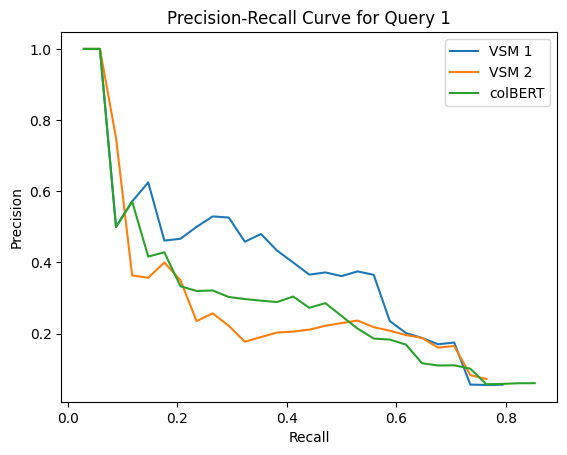

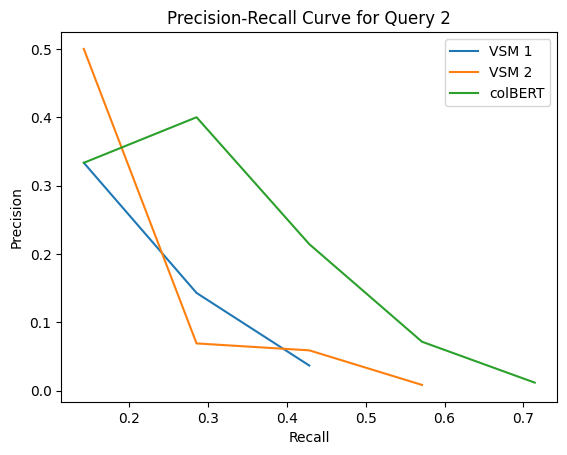

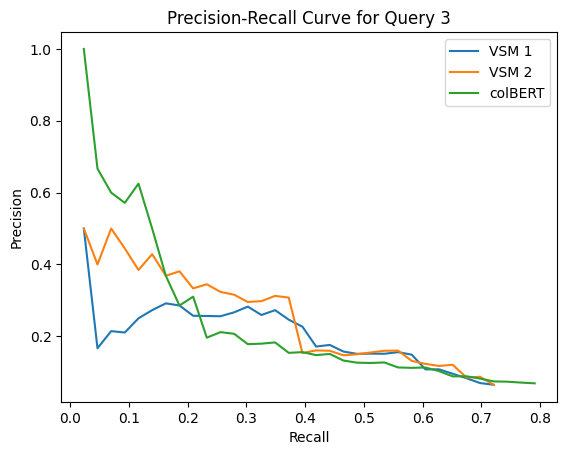

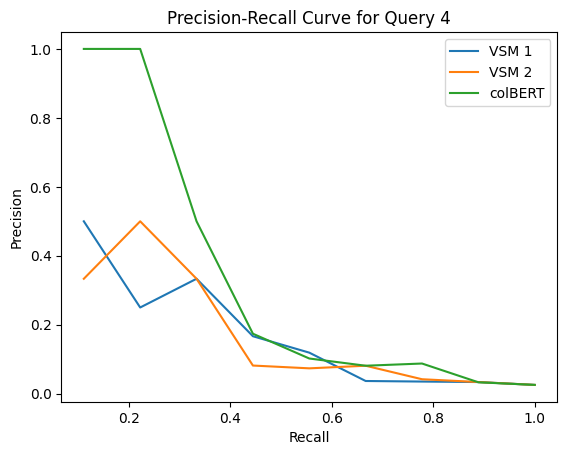

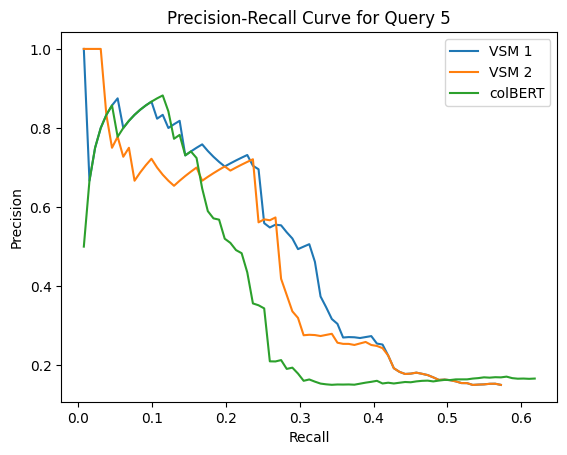

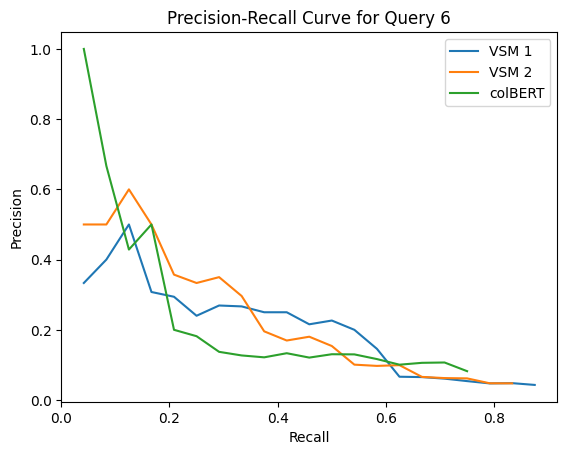

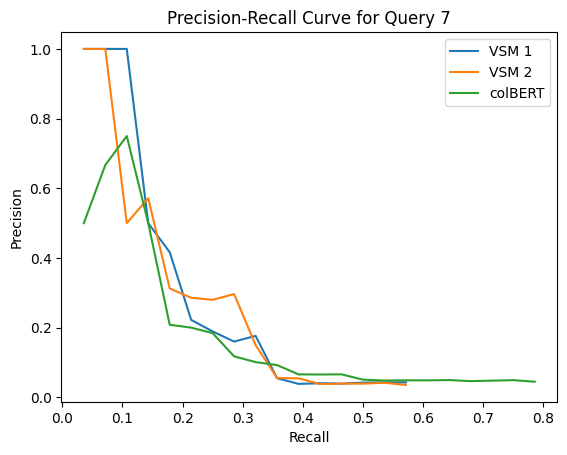

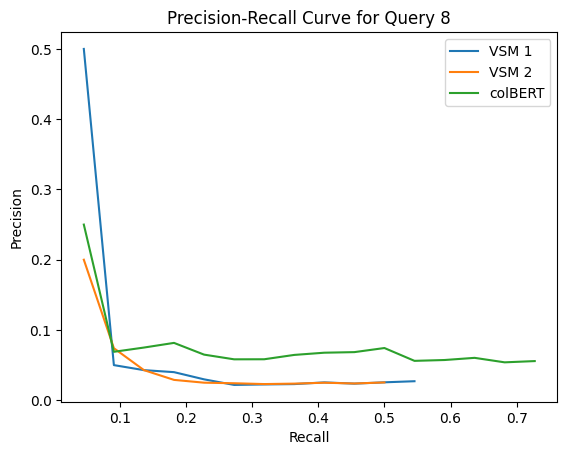

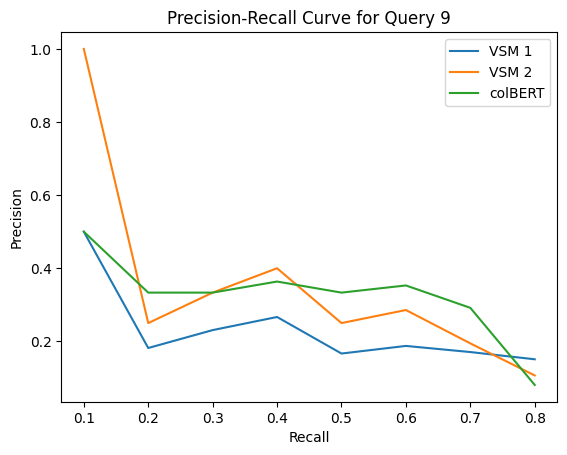

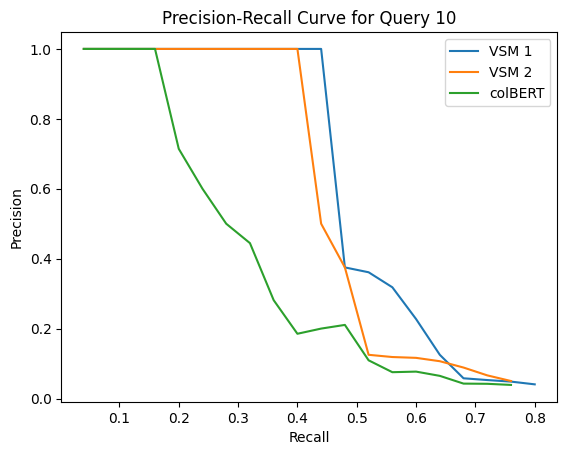

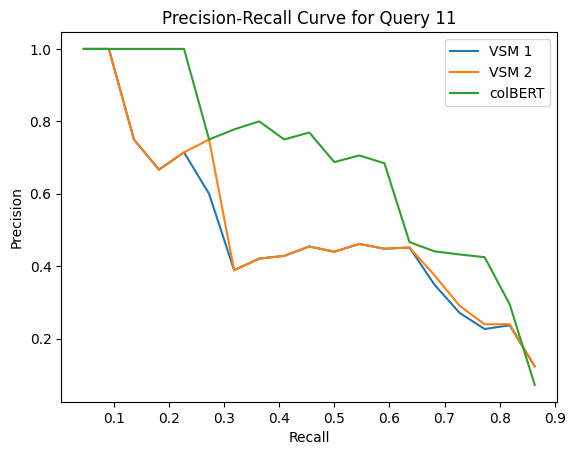

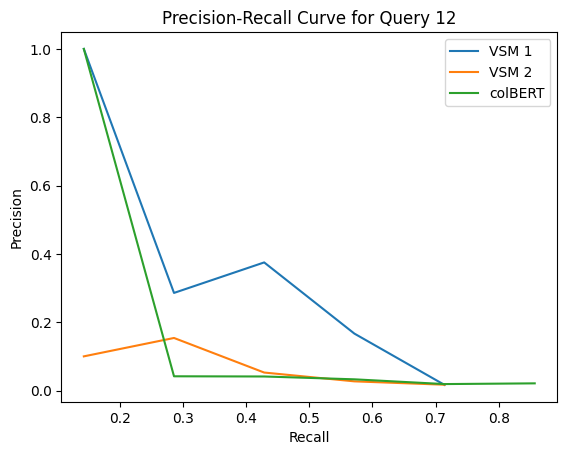

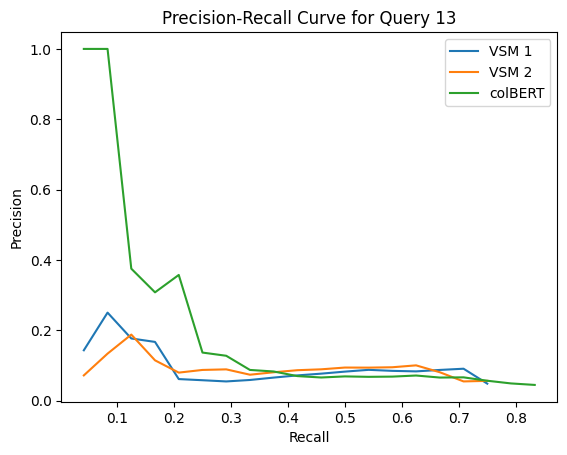

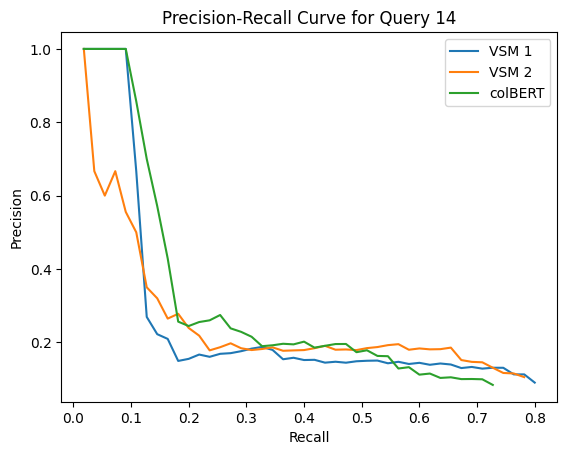

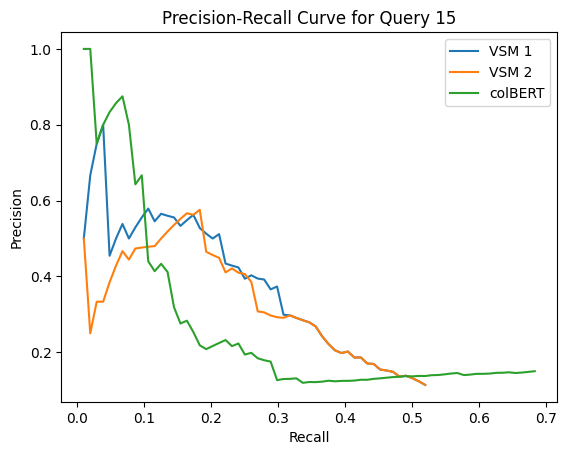

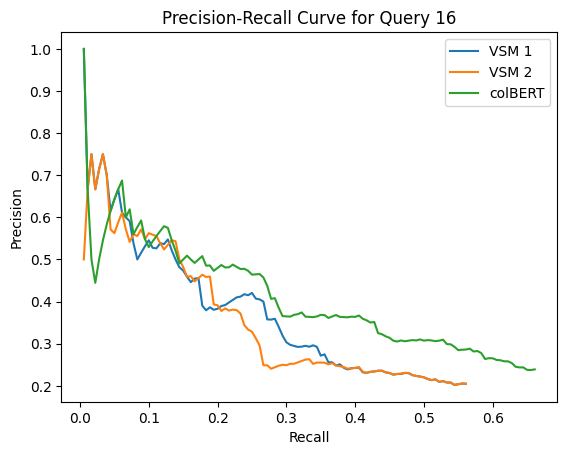

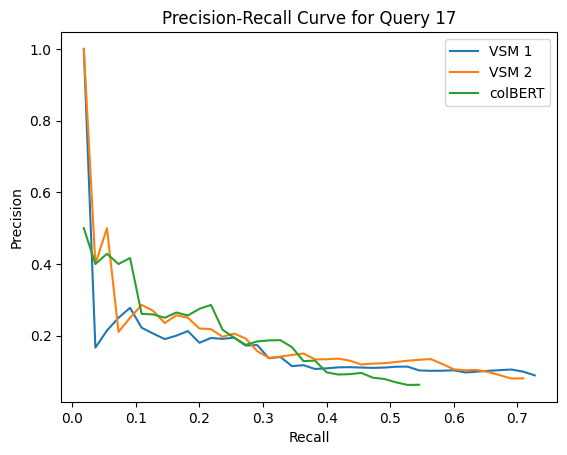

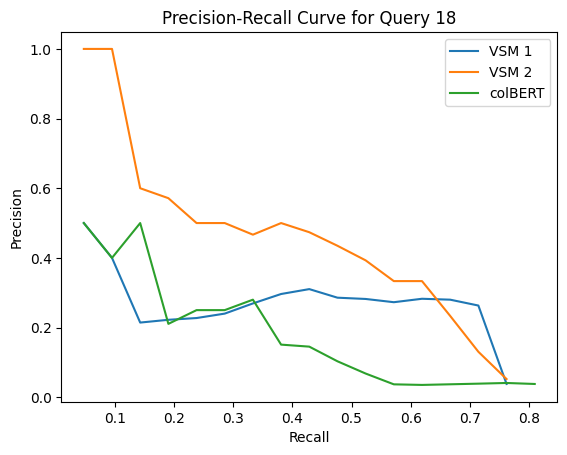

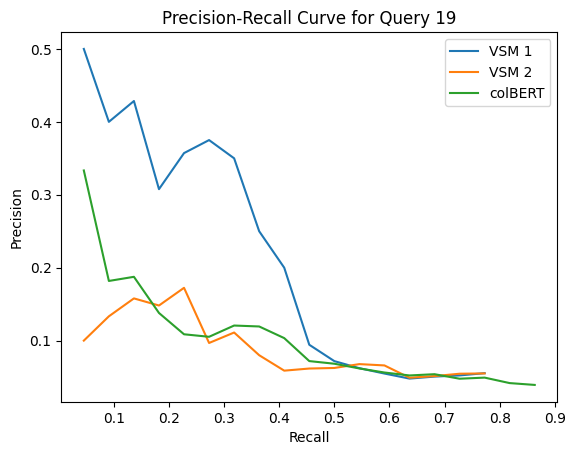

In [9]:
for i in range(len(vsm_rp_1)):
    plt.figure()
    plt.plot(vsm_rp_1[i][0], vsm_rp_1[i][1], label= "VSM 1")
    plt.plot(vsm_rp_2[i][0], vsm_rp_2[i][1], label= "VSM 2")
    plt.plot(colbert_rp[i][0], colbert_rp[i][1], label= "colBERT")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Query {i + 1}')
    plt.legend(loc='upper right')
    plt.show()